In [122]:
#These 2 lines automatically update the Jupyter notebook with the latest Python files you have imported so
#you do not have to restart the Jupyter notebook every time you make a change. 
%load_ext autoreload 
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from dsp_toolbox import dft, apply_dft_matrix, create_dft_matrix, plot_dft_magnitude_angle, idft, convolve_signals, zero_pad_signal
from utils import visualize_dft_matrix, generate_gaussian_kernel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Numpy and Matplotlib Python Libraries Primer

In [123]:
N = 32 # Number of samples in the signal
t_indices = np.arange(0,N) # This creates the time series indices.

In [124]:
f = 2/N #Frequency of the signal
y_signal = np.sin(2*np.pi*f*t_indices) #Creating the signal by inputting the temporal indices

In [125]:
# Often when things go wrong with your code, its useful to inspect the variables
# One way we can do this is by printing the parameters of the variables. With numpy this is easy!
size_of_T_array = t_indices.shape
size_of_Y_array = y_signal.shape
print(f"Size of <size_of_T_array> is: {size_of_T_array}")
print(f"Size of <size_of_Y_array> is: {size_of_T_array}")
print(f"Value of 4th item in <y_signal> is: {y_signal[3]}")
print(f"Values of 2nd through 5th items in <y_signal> is: {y_signal[1:6]}")

Size of <size_of_T_array> is: (32,)
Size of <size_of_Y_array> is: (32,)
Value of 4th item in <y_signal> is: 0.9238795325112867
Values of 2nd through 5th items in <y_signal> is: [0.38268343 0.70710678 0.92387953 1.         0.92387953]


Text(0.5, 0, 'Sample Number (n)')

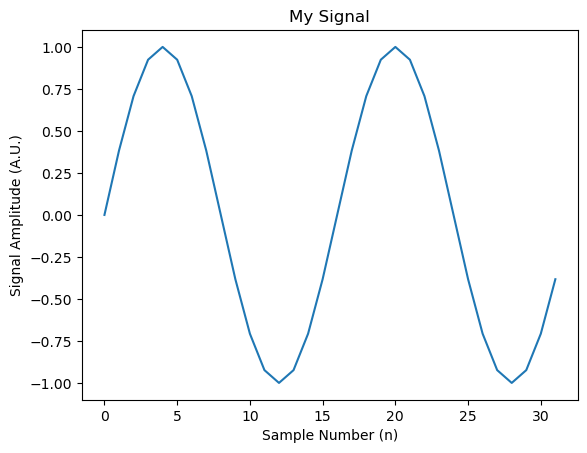

In [126]:
# Plotting a signal
plt.figure()
plt.plot(t_indices, y_signal)
plt.title("My Signal")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

# 2. DFT Basics

## 2.1 Create the DFT Matrix
In this section, find the <create_dft_matrix> function in dsp_toolbox.py and implement the function.

In [127]:
M = 16 #Do not change this value.
dft_mat = create_dft_matrix(length = M) #Create the DFT Matrix by scratch
                                        #Size M*M

We can visualize the matrix using the [visualize_dft_matrix] function, which plots each row of the matrix and seperates the real and imaginary components. Check the implementation for more information.

In [128]:
print(dft_mat) #default: all zeros; create a matrix of zeros in dft_toolbox 

[[ 1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j  9.23879533e-01-3.82683432e-01j
   7.07106781e-01-7.07106781e-01j  3.82683432e-01-9.23879533e-01j
  -2.22044605e-16-1.00000000e+00j -3.82683432e-01-9.23879533e-01j
  -7.07106781e-01-7.07106781e-01j -9.23879533e-01-3.82683432e-01j
  -1.00000000e+00+4.44089210e-16j -9.23879533e-01+3.82683432e-01j
  -7.07106781e-01+7.07106781e-01j -3.82683432e-01+9.23879533e-01j
   6.66133815e-16+1.00000000e+00j  3.82683432e-01+9.23879533e-01j
   7.0710

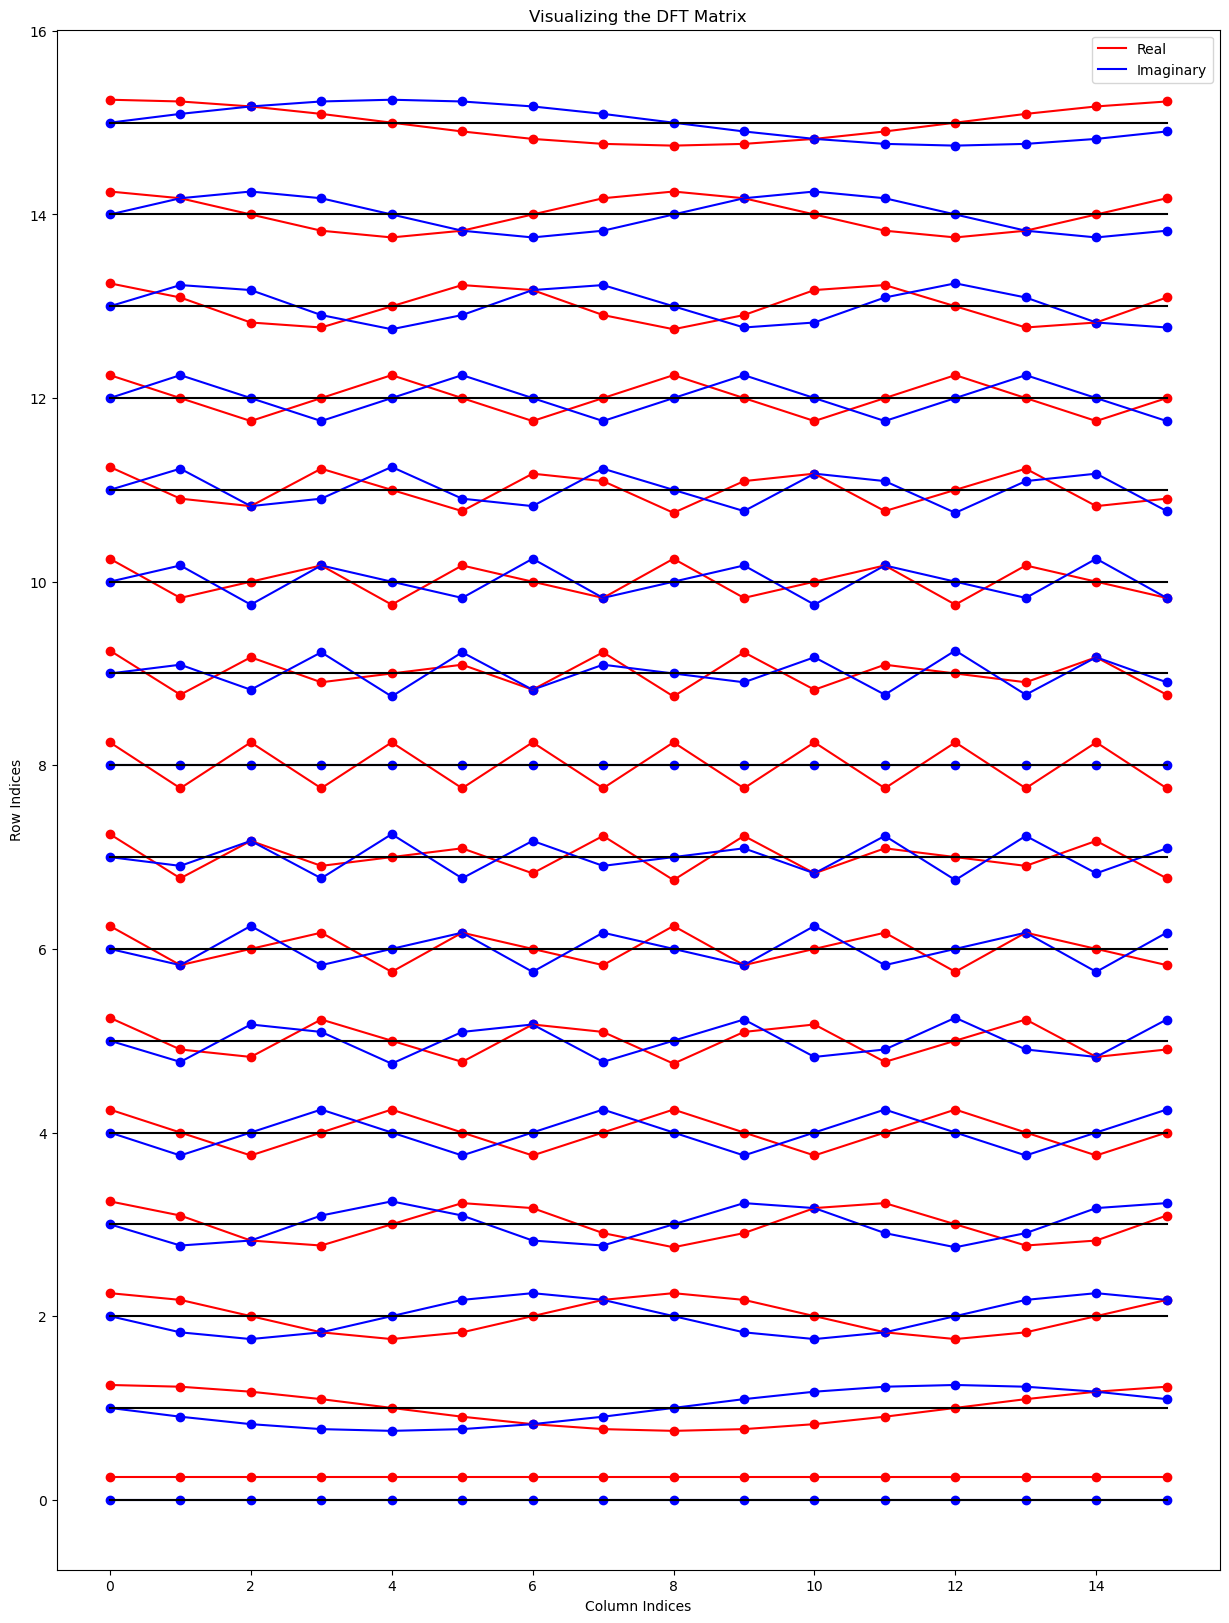

In [129]:
visualize_dft_matrix(dft_mat) # visualize every row of the matrix
                              # black 0 line; first row at bottom, start with DC components only
                              # as we go higher, we get higher freq, until we get to the middle row

Q1: What is an interesting property you can see of this matrix by looking at the plots?

Answer: *[-The 1st row of the matrix (bottom of the plot) is just ones. For k=0, X[k] only has DC components since $e^{-j\frac{2\pi}{N}*0*n}=1$.

-Starting k=1, sinusoidal plots show up due to the complex exponential. The frequency for the sinusoidal signal increases first and then decreases after the 8th row(k=8).

-The plot is symmetrical around the 8th row.
]*

## 2.2 Take the DFT of a Signal

Implement the <apply_dft_matrix> function in the dsp_toolbox.py file and run the remaining cells in this section.

In [130]:
Fy_signal = dft(y_signal) #y_signal is a sine func
                          #DFT to sine should resemble delta

Text(0.5, 0, 'Frequency Bins')

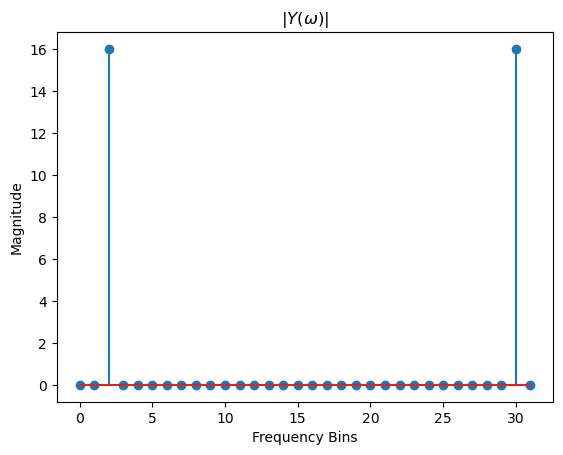

In [133]:
plt.stem(np.abs(Fy_signal)) #np.abs() takes the Magntude of the DFT before plotting 
plt.title(r"$|Y(\omega)|$")
plt.ylabel("Magnitude")
plt.xlabel("Frequency Bins")

Q2: Explain why the DFT Plot appears the way it does (why are there only two non-zero points)?

Answer: *[The DFT spectrum is mirrored since x[n] is a real signal. The higher frequencies alias back to the lower frequency. The latter non-zero point is a mirrored image of the previous plot.]*

Q3: Inspect the values of the non-zero locations of the DFT of the signal, are they real, imaginary, both? Why?

Answer: *[They are imaginary, since the DTFT for a sine signal would yield an imaginary result. Additionally, from the Zero-Phase Phase Plot, we can see not all there exist phase values at k=2, which indicates that the DFT of the signal is imaginary.]*

## 2.3 Plotting and Visualizing the DFT (Variances of Plotting DFT)

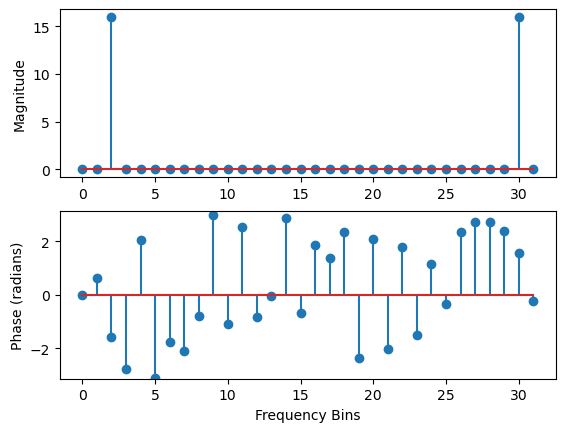

In [134]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format=None)

In [135]:
#In Lec: k=[0, 1, 2, 3, ..., N-1] as x-axis
#X[k] value as y-axis
#Odds are not all values of DFT are !=0 (e.g sine)
#See how the phase looks for the DFT


Q4: You may notice that the Phase Plot looks non-sensical, why would that be the case?

Answer: *[This might be due to spectral leakage. What we expect to see for the Phase Plot is that there should be non-zero values only for k=2 and k=30. The other locations that are expected to be zeroed are actually represented by some small floating-points in the system, which is why those extra phase values show up on the plot.]* 

You will often come across different ways of plotting the DFT. Please implement these forms in the following blocks by changing the [plot_dft_magnitude_angle] function and the input parameter [format].

### 2.3.1 Set the phase to zero if the magnitude of any point in the DFT is less than some small value (e.g. 1e-1)

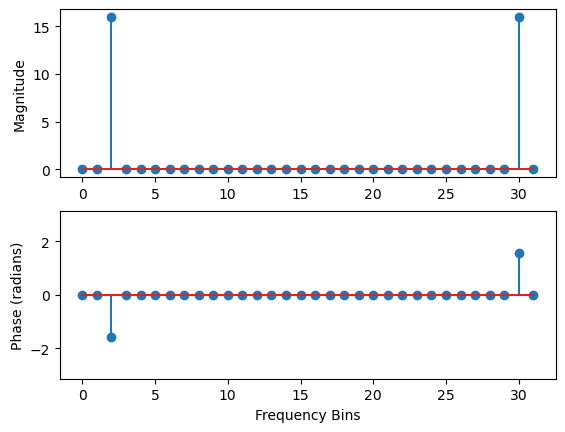

In [136]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="ZeroPhase")

### 2.3.2 Plot DFT such that the Frequency axis is normalized between [0, 1]

In [137]:
#k=[0/N, 1/N, 2/N, ..., N-1/N] normalized k-values for x-axis
#OR: k as [0, 2*pi]; k=[0, 2pi*1/N, 2pi*2/N, ..., 2pi*(N-1)/N]
#OR: NO: xlim=[-0.5, 0.5], shift corresponding X[k]'s, it requires shifting indices around

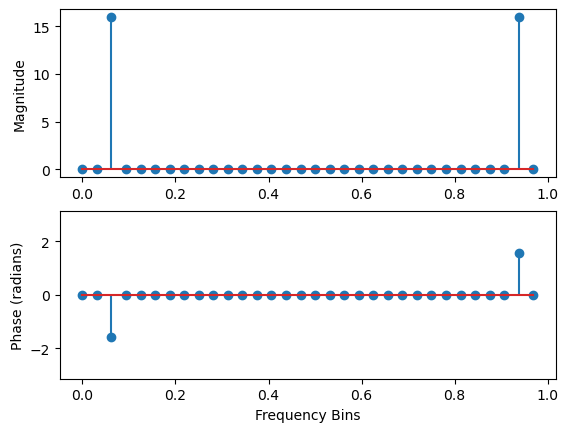

In [138]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="Normalized")

### 2.3.3 Plot DFT such that the Frequency axis is normalized between [-0.5, 0.5]

Hint: This will require shifting indices around.

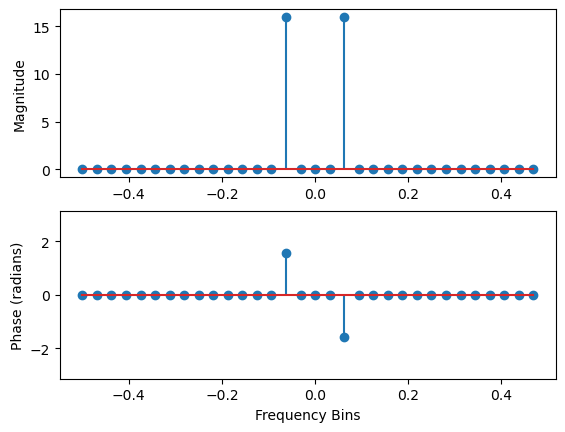

In [139]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="Centered_Normalized")

## 2.4 The inverse DFT

Implement the [idft] function by reusing functions you have already implemented.

In [140]:
reconstructed_y_signal = idft(Fy_signal)

Text(0.5, 0, 'Sample Number (n)')

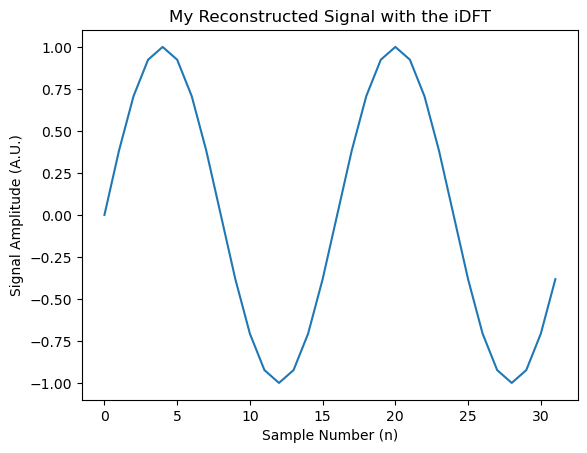

In [141]:
plt.figure()
plt.plot(t_indices, reconstructed_y_signal)
plt.title("My Reconstructed Signal with the iDFT")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

In [142]:
# Lets check the difference between the two signals by computing the L2 distance between them
# If this is much less than 1e-4 than we have done the idft correctly.
# IDFT(DFT(x[n])) should be close to x[n]
l2_dist = np.sqrt(np.sum(np.square(np.abs(reconstructed_y_signal - y_signal))))
print(f"The L2 distance between the 2 signals is: {l2_dist}")

The L2 distance between the 2 signals is: 7.442563965963103e-14


# 3. Properties of the DFT

## 3.1 Leakage in Spectrum

Text(0.5, 0, 'Sample Number (n)')

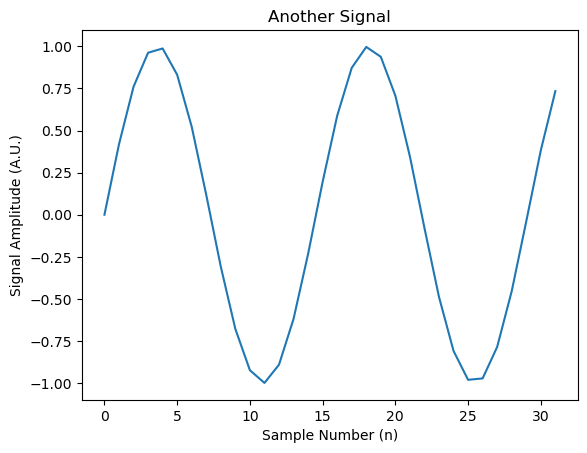

In [143]:
N = 32 # Number of samples in the signal
t_indices = np.arange(0,N) # This creates the time series indices.
f = 2.2/N #Frequency of the signal
y_leaky_signal = np.sin(2*np.pi*f*t_indices) #Creating the signal by giving the temporal indices

plt.figure()
plt.plot(t_indices, y_leaky_signal)
plt.title("Another Signal")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

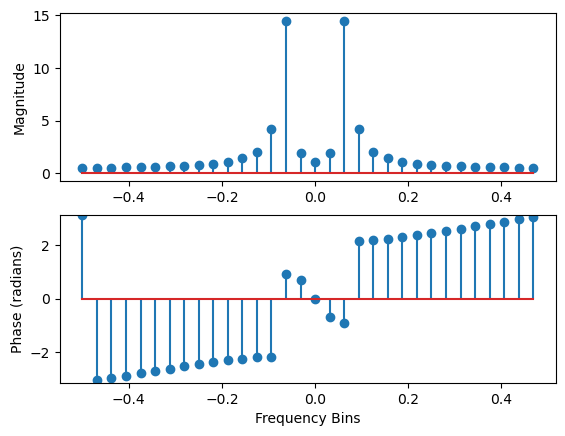

In [144]:
Fy_leak_signal = dft(y_leaky_signal)
plot_dft_magnitude_angle(np.arange(N) , Fy_leak_signal, format="Centered_Normalized")

Q5: The frequency used to generate the sinusoidal signal is similar to the one used in Part 1. Then why does the frequency spectrum look like this?

Answer: *[Since we are taking two periods from a sinusoidal signal $x[n]$, this is equivalent to  multiplying the original signal with a rectangular window $w[n]$: $y[n]=x[n]*w[n]; w[n]=u[n]-u[n-2*N_0]$. Due to the time-frequency duality, it becomes $Y[\Omega]=X[\Omega]{\star}W[\Omega]$ in the frequency domain with $W[\Omega]$ as a sinc function.


If we change $x[n]$'s frequency from $f=\frac{2}{N}$ into $f=\frac{2.2}{N}$, we'll also change $N_0=\frac{N}{2}$ into $N_0=\frac{N}{2.2}$. After setting DFT_size $=N$ and do DFT calculations for both signals, we'll find that in the previous case, $X[k]\neq0$ only at $k=1$. The rest of the sampled points of the DFT perfectly corresponds with the Notches in the frequency spectrum where zeros occur. However, for the latter case, we get more non-zero samples in the DFT. That is because the DFT size N is no longer a multiple of $N_0$.  In part one, $W[k]$ only has non-zero value at $k=0$, which resembles a {\delta} function. Thus, the convolution result $Y[k]$ is a sampling of $X[\Omega]$ with the only two peaks show up on the plot that correspond to the frequency of $x[n]$. Nevertheless, in Part2, $W[k]$ can no longer be considered as a {\delta} function due to the extra non-zero values. Thus, there exist non-zero frequency values next to the two major peaks on the Magnitude plot.*

## 3.2 Frequency Resolution

### 3.2.1 Rescaling the X-axis

Modify the plot function to rescale the X-axis to plot the spectrum w.r.t the original frequency limits (Modify the "centered" case to obtain the rescaled plots). For example, if the sampling frequency is 8000Hz, then the x-axis should be [-4000Hz,4000Hz]

Use the key-word argument [fs] to specify the sampling frequency. We'll call this [format="Centered_Original_Scale"]. 

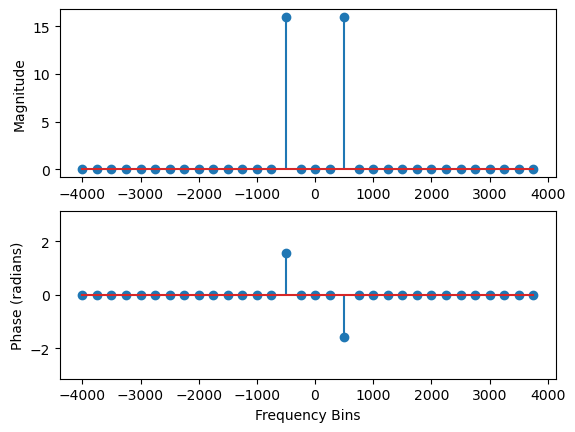

In [145]:
fs = 8000 # Don't alter this value. This is the sampling frequency
#2pi <=> Fs
#f = (k/N)*Fs
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, fs=8000, format="Centered_Original_Scale")

Q6: Given the sampling frequency [fs], the number of samples [N] and the index [i] of the spectral peak of a sinusoid, how do you calculate the frequency of the sinusoid prior to sampling.

Ans: *[$f_0=\frac{i}{N}*fs$]*

Q7: Now that we know how to find the sinusoid's original frequency, we want to find how precise these estimations are. How do you find the frequency resoltuion of the frequency spectrum? Given the mathematical formula for this value, give the sampling frequency <fs> and the number of samples <N>.<br/>
(Hint: Use the same logic as the previous question to derive the formula, but don't factor in the spectral peak in your formulation)

Ans: *[$\Delta$$f_{res}=\frac{fs}{N}$]*

Q8: Given the frequency resolution, consider the following scenario: I have 2 sinusoids whose frequency difference is less than the resolution limit, i.e. ($f_{S1} - f_{S2} < $ resolution_limit). What would the frequency spectrum of $y[n] = x_{S1}[n] + x_{S2}[n]$ look like? Can we distinguish these frequncies? If yes, explain how we can distinguish the 2 peaks. If no, please propose a solution to resolve the peaks.

Ans: *[The spectral peak will be unresolved. The peaks would merge together and ee can't tell the difference between these frequencies. We should increase the frequency resolution by increasing our DFT size. We can either take a larger chunk of signal or we can use zero padding]*

## 3.2.2 Zero-Padding

Implement the [zero_pad_signal] function in the [dsp_toolbox_sol.py] file. Then see how zero-padding a signal affects its DFT.

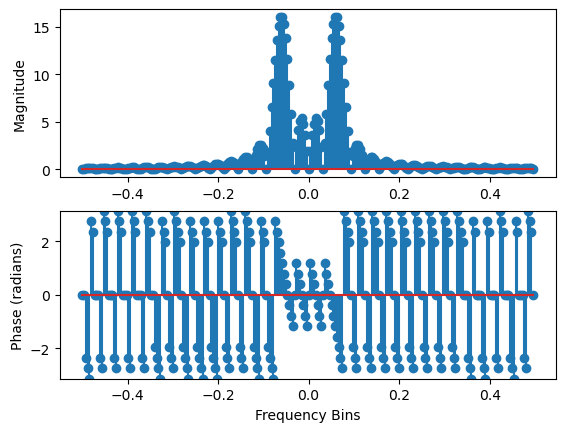

In [146]:
new_N = 256
y_signal_padded = zero_pad_signal(y_signal, new_N)
plot_dft_magnitude_angle(np.arange(new_N), f_signal=dft(y_signal_padded), fs=8000, format="Centered_Normalized") # Centered_Original_Scale, Centered_Normalized 

Q9: Why does the DFT of the zero-padded function look different than the the DFT of the original function?

Ans: [Zero-padding increases the DFT size N by appending zeros to the signal in the time domain. With a larger DFT size, we can get a better frequency resolution as we have more points showing up on the plot. Yet, since we have even more points in the k-domain, the spectral leakage issue will aggravate.]

## 3.2.3 Resolving 2 Frequencies

We have created a signal, [new_y_signal] which is a combination of 2 sinusoids that have similar frequencies. Edit the parameter [new_n] until you can see 2 distinct frequencies in the frequency domain.

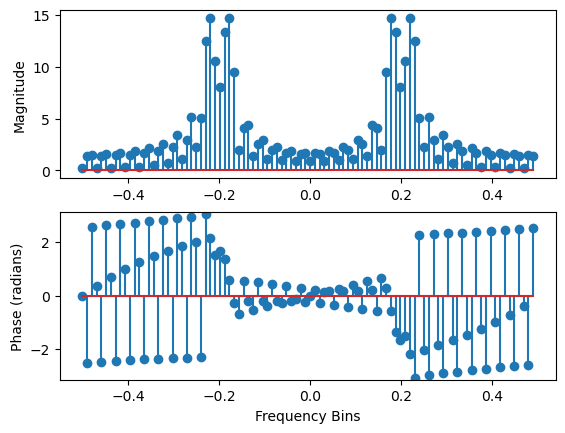

In [147]:
#***************************** Change the parameter under this line *****************************
new_N = 32*3
#***************************** Change the parameter above this line *****************************
f1 = 6/N
f2 = 6.8/N
new_y_signal = np.sin(2*np.pi*f1*t_indices) + np.sin(2*np.pi*f2*t_indices)
new_y_signal_padded = zero_pad_signal(new_y_signal, new_N)
plot_dft_magnitude_angle(np.arange(new_N), f_signal=dft(new_y_signal_padded), fs=8000, format="Centered_Normalized")

Q10: What parameter [new_N] did you select?

Ans: [I chose new_N $=3*N=96$. I can see that each peak is now represented by 3 stems on the Magnitude plot]

## 3.3 Convolution

In this section we will implement convolution with the DFT. Our two signals of interest are x[n], a Sinc function, and y[n], a Gaussian function. We want to produce z[n] = x[n] * y[n]. Time-Frequency Duality

Text(0.5, 0, 'Sample Number (n)')

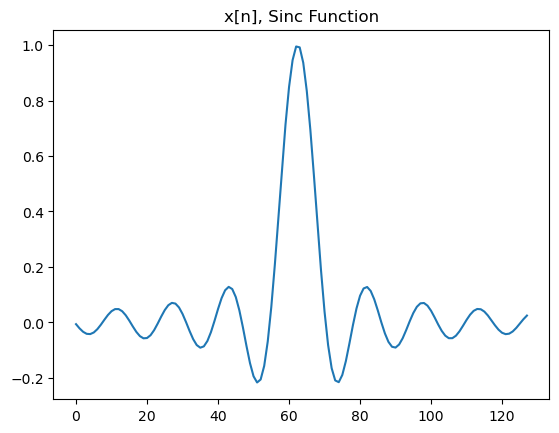

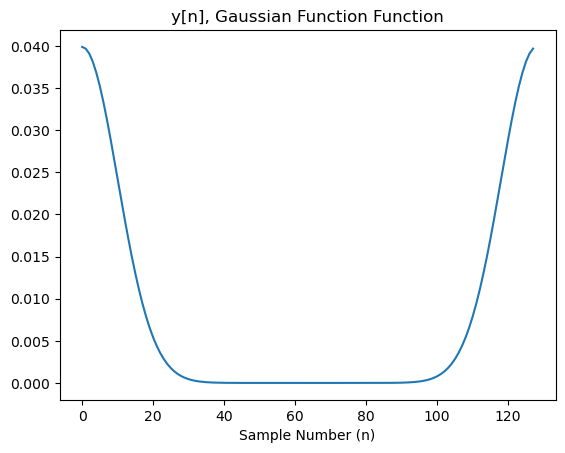

In [148]:
N = 128
t = np.arange(N)
x = np.sin(0.4*(t-N/2.05))/(0.4*(t-N/2.05))

std = 10
y = generate_gaussian_kernel(std, N)

plt.figure()
plt.plot(t, x)
plt.title("x[n], Sinc Function")
plt.figure()
plt.plot(t, y)
plt.title("y[n], Gaussian Function Function")
plt.xlabel("Sample Number (n)")

Implement the function [convolve_signals] located in the [dsp_toolbox.py] file and then run the cell below.

Text(0.5, 0, 'Sample Number (n)')

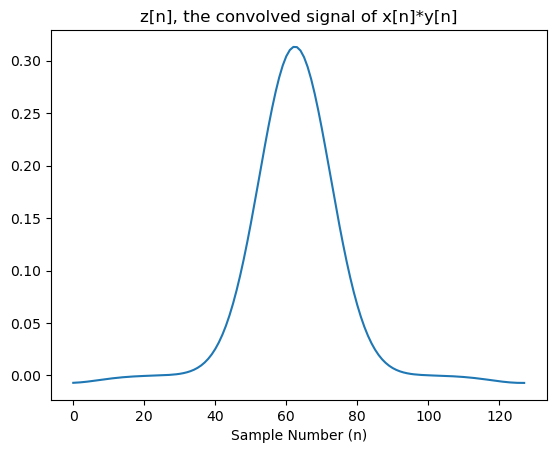

In [149]:
z_signal = convolve_signals(x, y)

plt.plot(z_signal)
plt.title("z[n], the convolved signal of x[n]*y[n]")
plt.xlabel("Sample Number (n)")

### 3.3.1 Removing Noise

We have now added noise to the original sinc function x[n] thus producing x_noise[n]. Let's try to pick a Gaussian function that will reduce the amount of noise in the signal. You will do this by adjusting the parameter [std], or the standard deviation of the Gaussian Function.

You can see how well you do with the comparison plot or by seeing how low you can make the L2 error between the original and filtered signal go.

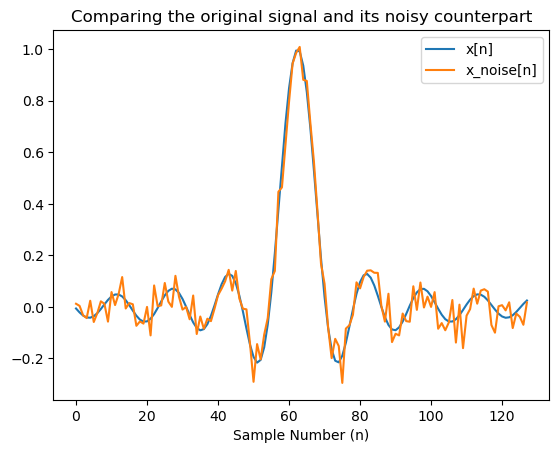

In [116]:
N = 128
t = np.arange(N)

noise = np.random.normal(loc=0, scale=0.05, size=N)
x_noise = np.sin(0.4*(t-N/2.05))/(0.4*(t-N/2.05)) + noise

plt.figure()
plt.plot(t, x, label = "x[n]")
plt.plot(t, x_noise, label = "x_noise[n]")
plt.title("Comparing the original signal and its noisy counterpart")
plt.xlabel("Sample Number (n)")
plt.legend()

Text(0.5, 0, 'Sample Number (n)')

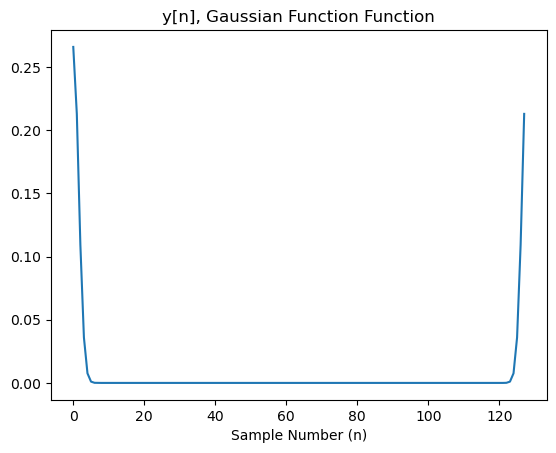

In [120]:
#***************************** Change the parameter under this line *****************************
#Try using parameters between 0.01 to 100
std = 1.5
#***************************** Change the parameter above this line *****************************
y = generate_gaussian_kernel(std, N)
plt.figure()
plt.plot(t, y)
plt.title("y[n], Gaussian Function Function")
plt.xlabel("Sample Number (n)")

The L2 distance between the Noisy and Original Signal is: 0.5581064175017727
The L2 distance between the Filtered and Original signals is: 0.2975778223699507


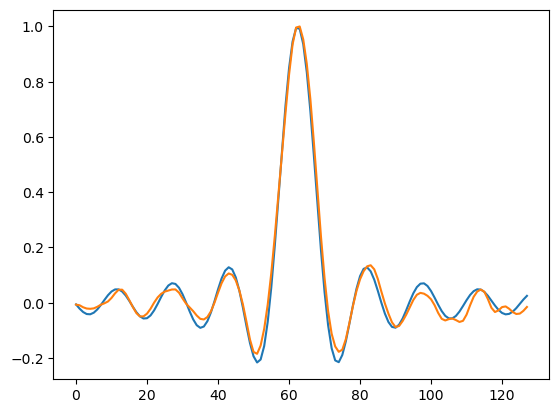

In [121]:
z_filtered_signal = convolve_signals(x_noise, y)
z_filtered_signal = z_filtered_signal / np.max(z_filtered_signal) #normalizing the filtered signal

plt.plot(x)
plt.plot(z_filtered_signal)
l2_dist_original = np.sqrt(np.sum(np.square(np.abs(x_noise - x))))
print(f"The L2 distance between the Noisy and Original Signal is: {l2_dist_original}")
l2_dist_now = np.sqrt(np.sum(np.square(np.abs(z_filtered_signal - x))))
print(f"The L2 distance between the Filtered and Original signals is: {l2_dist_now}")

Q11: What parameter [std] did you select to attenuate noise and what was the improvement in error?

Ans: [I choose $std=1.6$. Previously, the L2 distance between the Noisy and Original Signal is: 0.5581064175017727.
The L2 distance between the Filtered and Original signals is: 3.1941707657126335 

Now, the L2 distance between the Noisy and Original Signal is: 0.5581064175017727. The L2 distance between the Filtered and Original signals is: 0.2975778223699507]

### 3.3.2 Analyze the Noisy and Filtered Signal in the Frequency Domain

Plot and analyze the functions in this section, the first one has been done for you.

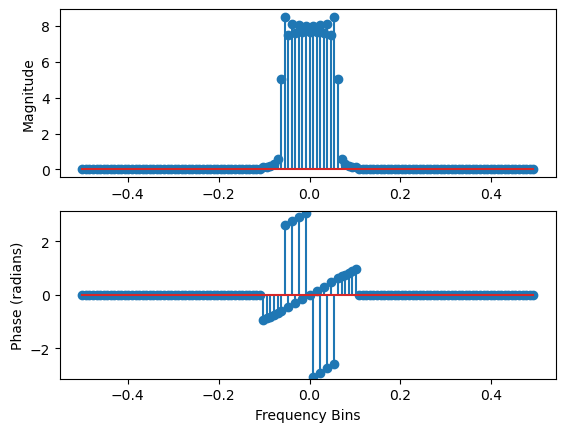

In [156]:
#0. Convert the original signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(x), format="Centered_Normalized") #This has been done for you already.
#***************************** Add your implementation above this line *****************************

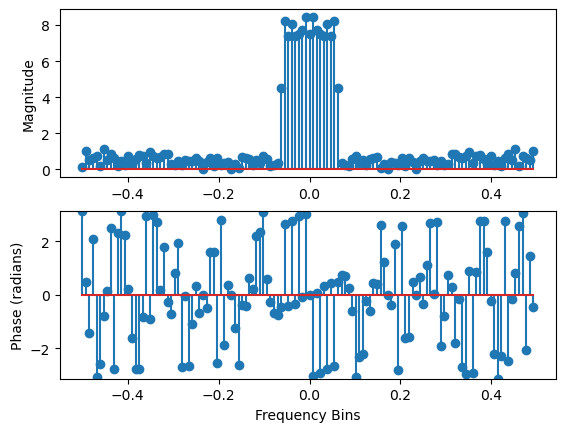

In [157]:
#1. Convert the noisy signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(x_noise), format="Centered_Normalized")
#***************************** Add your implementation above this line *****************************

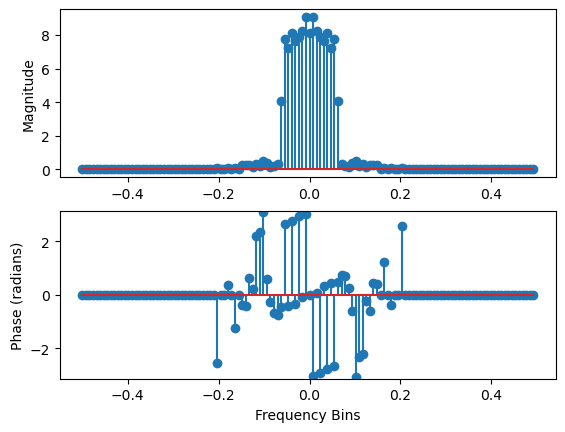

In [158]:
#2. Convert the filtered signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(z_filtered_signal), format="Centered_Normalized")
#***************************** Add your implementation above this line *****************************

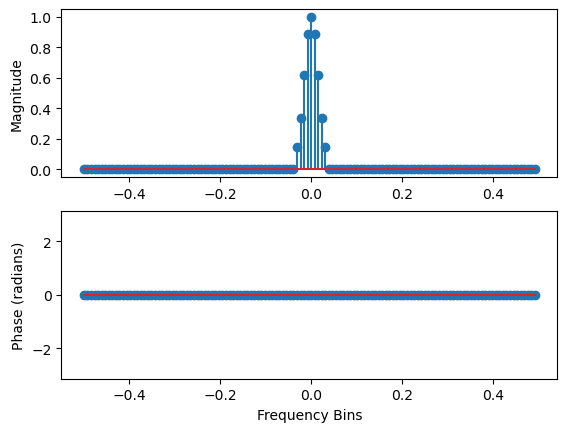

In [159]:
#3. Convert the Gaussian signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(y), format="Centered_Normalized")
#***************************** Add your implementation above this line *****************************

Q12: Compare and contrast the frequency spectrums of the noisy and the filtered Signal:

Ans: *[The noisy signal has a lot of non-zero values "noises" surrounding the main lobe on the frequency magnitude spectrum, whereas the filtered signal has a more protruding lobe with its surrounding frequencies close to zero]*

Q13: Why does the filtered signal's spectrum make sense when compared with the Gaussian signal's frequency spectrum?

Ans: *[Because the Gaussian signal tapers down noises in the higher frequencies as we look at its magnitude spectrum. The Gaussian keeps the main lobe while cutting off the high frequency noises.]*